In [407]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [408]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [409]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [410]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

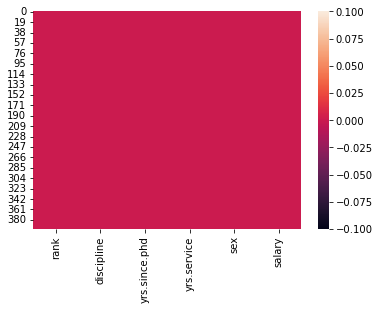

In [411]:
sns.heatmap(df.isnull())

In [412]:
df_visualization_nominal= df[['rank','discipline','sex']].copy()

In [413]:
df_visualization_nominal.columns

Index(['rank', 'discipline', 'sex'], dtype='object')

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


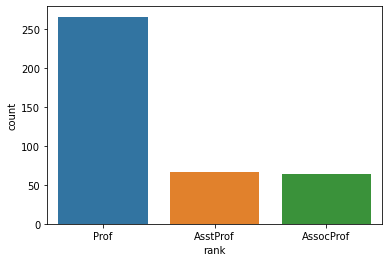

In [414]:
ax= sns.countplot(x='rank', data=df_visualization_nominal)
print(df_visualization_nominal['rank'].value_counts())

B    216
A    181
Name: discipline, dtype: int64


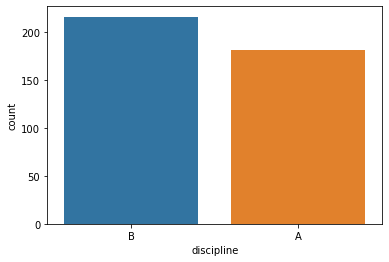

In [415]:
ax= sns.countplot(x='discipline', data=df_visualization_nominal)
print(df_visualization_nominal['discipline'].value_counts())

Male      358
Female     39
Name: sex, dtype: int64


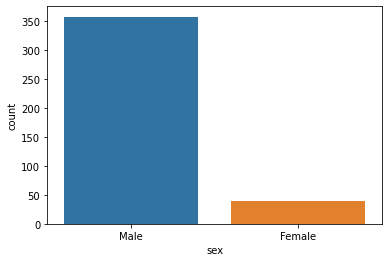

In [416]:
ax= sns.countplot(x='sex', data=df_visualization_nominal)
print(df_visualization_nominal['sex'].value_counts())

In [417]:
df_vizualization_continuous = df[['yrs.since.phd','yrs.service','salary']].copy()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

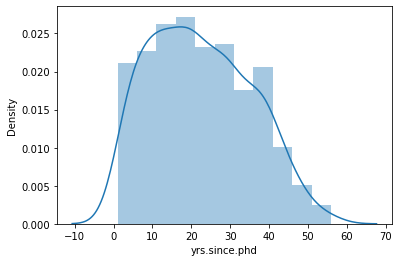

In [349]:
sns.distplot(df_vizualization_continuous['yrs.since.phd'], kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

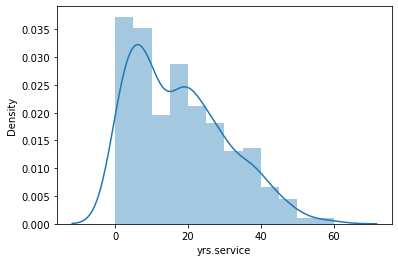

In [418]:
sns.distplot(df_vizualization_continuous['yrs.service'], kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

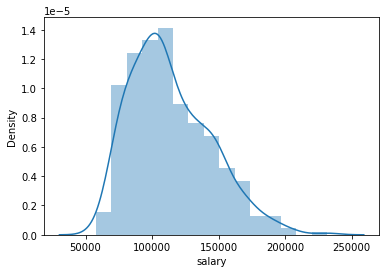

In [419]:
sns.distplot(df_vizualization_continuous['salary'], kde=True)

# Encoding

In [420]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()

In [421]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= encoder.fit_transform(df[i].values.reshape(-1,1))

In [422]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [427]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

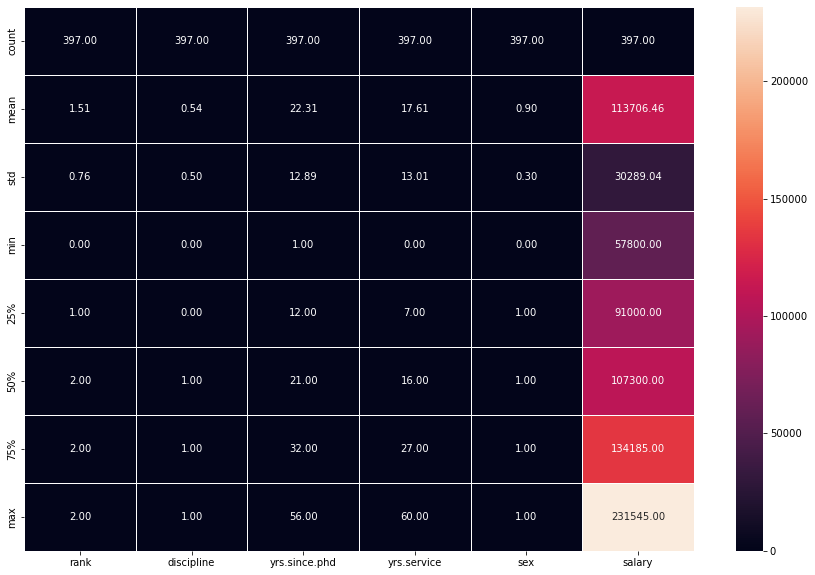

In [428]:
plt.figure(figsize=(15,10))
sns.heatmap(df.describe(), annot=True, linewidth=1, linecolor='white', fmt='0.2f')

In [429]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

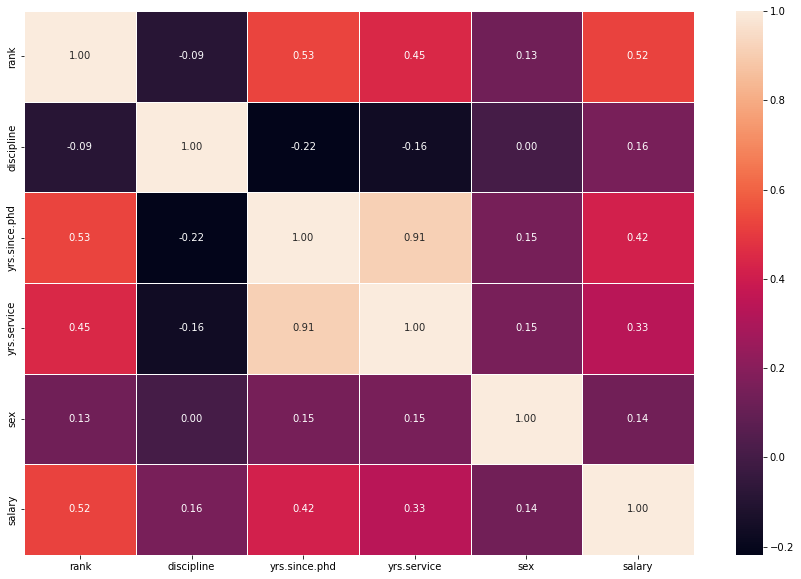

In [426]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidth=1, linecolor='white', fmt='0.2f')

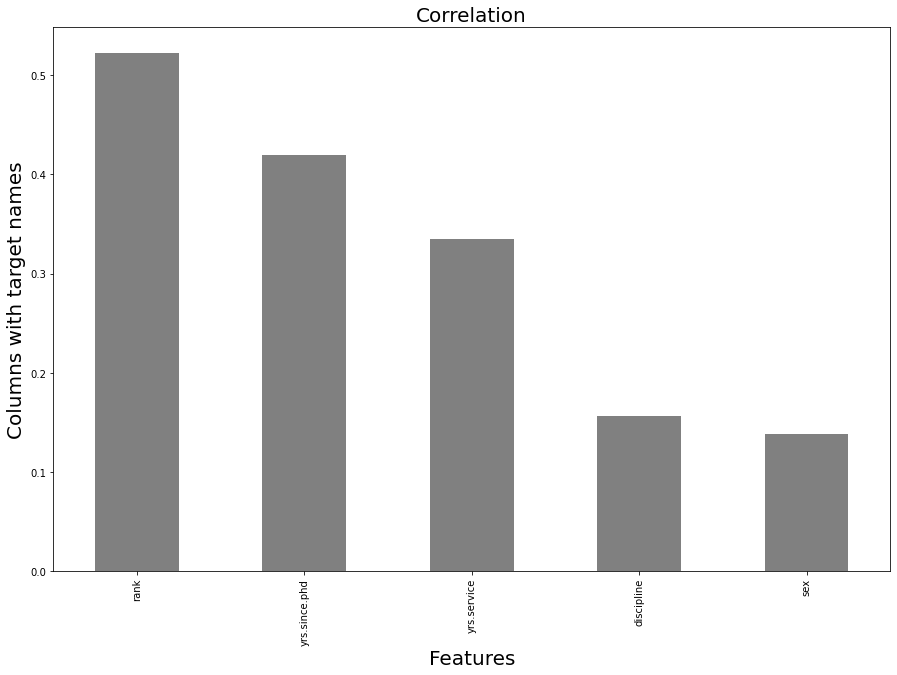

In [430]:
plt.figure(figsize= (15,10))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='Grey')
plt.xlabel('Features', fontsize=20)
plt.ylabel('Columns with target names', fontsize=20)
plt.title('Correlation', fontsize=20)
plt.show()

In [431]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Keeping +/-0.50 range of skewness. The columns whose does not lie all are catagorical rank, descipline & sex

<AxesSubplot:ylabel='Frequency'>

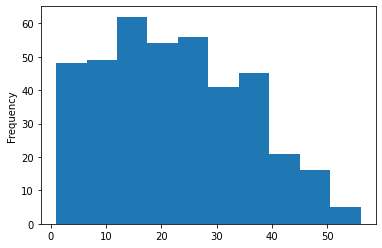

In [432]:
df['yrs.since.phd'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

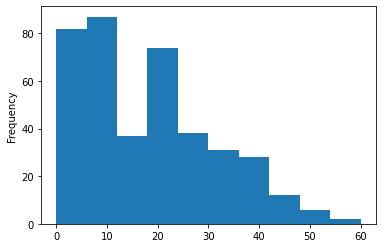

In [433]:
df['yrs.service'].plot.hist()

# Checking Outlier

<AxesSubplot:>

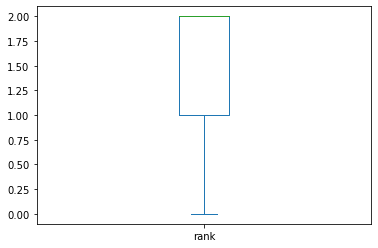

In [434]:
df['rank'].plot.box()

<AxesSubplot:>

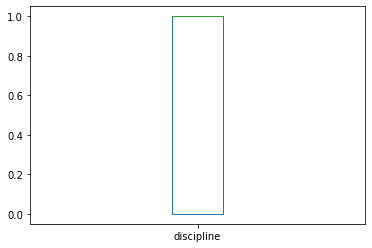

In [435]:
df['discipline'].plot.box()

<AxesSubplot:>

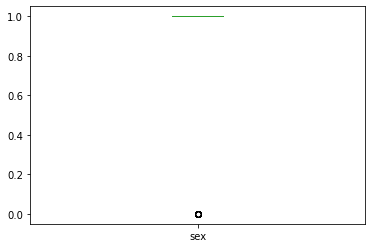

In [436]:
df['sex'].plot.box()

In [437]:
df= df.drop(['sex','discipline'],axis=1)
df

,rank,yrs.since.phd,yrs.service,salary
0,2.0,19,18,139750
1,2.0,20,16,173200
2,1.0,4,3,79750
3,2.0,45,39,115000
4,2.0,40,41,141500
...,...,...,...,...
392,2.0,33,30,103106
393,2.0,31,19,150564
394,2.0,42,25,101738
395,2.0,25,15,95329


# Removing Outliers 

In [438]:
df.shape

(397, 4)

In [439]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([3, 2, 2, 3], dtype=int64))


In [440]:
z.iloc[364]

rank             0.649257
yrs.since.phd    1.607142
yrs.service      1.954281
salary           3.034410
Name: 364, dtype: float64

In [441]:
df_new=df[(z<3).all(axis=1)]
df_new

,rank,yrs.since.phd,yrs.service,salary
0,2.0,19,18,139750
1,2.0,20,16,173200
2,1.0,4,3,79750
3,2.0,45,39,115000
4,2.0,40,41,141500
...,...,...,...,...
392,2.0,33,30,103106
393,2.0,31,19,150564
394,2.0,42,25,101738
395,2.0,25,15,95329


In [442]:
df_new.shape

(393, 4)

#Loss percentage

In [443]:
data_loss=((397-354)/397)*100
data_loss

10.831234256926953

In [444]:
x= df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

In [445]:
x

,rank,yrs.since.phd,yrs.service
0,2.0,19,18
1,2.0,20,16
2,1.0,4,3
3,2.0,45,39
4,2.0,40,41
...,...,...,...
392,2.0,33,30
393,2.0,31,19
394,2.0,42,25
395,2.0,25,15


In [446]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 393, dtype: int64

# Transfroming data to remove skewness

In [447]:
from sklearn.preprocessing import power_transform
x= power_transform(x,method='yeo-johnson')

In [394]:
x

array([[ 0.69481738, -0.11344983,  0.26888583],
       [ 0.69481738, -0.03455335,  0.1209006 ],
       [-1.0753989 , -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738,  1.42772852,  0.72581897],
       [ 0.69481738,  0.33874878,  0.04312953],
       [-1.0753989 , -1.12908354, -1.11979784]])

In [448]:
pd.DataFrame(x).skew()

0   -0.818160
1   -0.134628
2   -0.129060
dtype: float64

In [449]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.33,random_state=45)

In [450]:
xtrain.shape

(263, 3)

In [451]:
xtest.shape

(130, 3)

In [452]:
ytrain.shape

(263,)

In [453]:
ytest.shape

(130,)

In [454]:
ln= LinearRegression()

In [455]:
ln.fit(xtrain,ytrain)

LinearRegression()

In [456]:
ln.coef_

array([12941.43881295,  8165.28783556, -2314.829972  ])

In [457]:
ln.intercept_

113092.86501272245

In [458]:
df_new.columns

Index(['rank', 'yrs.since.phd', 'yrs.service', 'salary'], dtype='object')

In [459]:
ln.score(xtrain,ytrain)

0.370976943615862

In [387]:
pred= ln.predict(xtest)

In [388]:
print("Predicted Salary", pred)
print("Actual Salry",ytest)

Predicted Salary [123606.78075924  88330.83243641 122726.30172959 123972.31236793
 122651.59382347 121024.03573259 138340.15601406 122240.70033979
 131600.47766678 124383.20585161 124599.32164807 119703.31718812
 100660.22450797  99617.34079673 126621.75737879 128174.60756354
 123353.31100972 123822.89655569 116165.3852257   95257.280549
 115060.78247769  93907.55729135 124524.61374194 122315.40824591
 133660.26735056  95049.51399242  84942.31628624 104459.63414182
 125188.97697514 125039.56116289  97923.08272165 117344.69587984
 115284.90619606 125188.97697514  86084.27298732  97885.72876859
  93907.55729135  92765.60059027  96743.77206751 118083.76701916
 135541.29519095 127286.12061198 112336.62956071  83285.41216422
  87591.76129709 137713.14673392 122352.76219897 115837.20757007
 105489.52898371  84352.66095917 121397.5752632   96818.47997363
  93317.90196428 127248.76665892  89069.90357573 135720.05703434
 123868.25843067 116717.68659971 133510.85153831 115837.20757007
 121688.39

In [389]:
print("Mean Absolute Error", mean_absolute_error(ytest,pred))
print("Mean Squared Error", mean_squared_error(ytest,pred))
print("Root Sqyare Error",np.sqrt(mean_squared_error(ytest,pred)))

Mean Absolute Error 19988.305815762502
Mean Squared Error 601546175.5207036
Root Sqyare Error 24526.438296676988


In [390]:
from sklearn.metrics import r2_score

In [391]:
print(r2_score(ytest,pred))

0.28988657809602414


# Save the data

In [392]:
df = pd.DataFrame(pred)
df.to_csv('Salary.csv')